In [1]:
import pandas as pd
import json
import os

In [2]:
all_data = pd.read_csv('Datasets/all_data.csv')

In [3]:
all_data

,date,price,quantity,hash_name
0,2022-05-11 01:00:00,0.999,593,Jsons/crate_json/Antwerp 2022 Challengers Stic...
1,2022-05-12 01:00:00,0.979,1281,Jsons/crate_json/Antwerp 2022 Challengers Stic...
2,2022-05-13 01:00:00,0.988,1547,Jsons/crate_json/Antwerp 2022 Challengers Stic...
3,2022-05-14 01:00:00,0.993,1258,Jsons/crate_json/Antwerp 2022 Challengers Stic...
4,2022-05-15 01:00:00,0.992,1603,Jsons/crate_json/Antwerp 2022 Challengers Stic...
...,...,...,...,...
28374307,2024-03-25 14:00:00,0.030,1,Jsons/sticker_json/Sticker | aliStair | Rio 2022
28374308,2024-03-25 15:00:00,0.030,1,Jsons/sticker_json/Sticker | aliStair | Rio 2022
28374309,2024-03-25 20:00:00,0.030,1,Jsons/sticker_json/Sticker | aliStair | Rio 2022
28374310,2024-03-25 22:00:00,0.030,3,Jsons/sticker_json/Sticker | aliStair | Rio 2022


In [4]:
all_data.hash_name[0].split('/')[2]

'Antwerp 2022 Challengers Sticker Capsule'

In [5]:
all_data.hash_name = all_data.hash_name.apply(lambda x : x.split('/')[2])

all_data

,date,price,quantity,hash_name
0,2022-05-11 01:00:00,0.999,593,Antwerp 2022 Challengers Sticker Capsule
1,2022-05-12 01:00:00,0.979,1281,Antwerp 2022 Challengers Sticker Capsule
2,2022-05-13 01:00:00,0.988,1547,Antwerp 2022 Challengers Sticker Capsule
3,2022-05-14 01:00:00,0.993,1258,Antwerp 2022 Challengers Sticker Capsule
4,2022-05-15 01:00:00,0.992,1603,Antwerp 2022 Challengers Sticker Capsule
...,...,...,...,...
28374307,2024-03-25 14:00:00,0.030,1,Sticker | aliStair | Rio 2022
28374308,2024-03-25 15:00:00,0.030,1,Sticker | aliStair | Rio 2022
28374309,2024-03-25 20:00:00,0.030,1,Sticker | aliStair | Rio 2022
28374310,2024-03-25 22:00:00,0.030,3,Sticker | aliStair | Rio 2022


In [6]:
len(all_data.date.unique())

4764

In [7]:
len(all_data.hash_name.unique())

16328

In [8]:
all_data.describe()

,price,quantity
count,2.837431e+07,2.837431e+07
mean,2.468636e+01,1.856173e+02
std,9.340582e+01,2.539954e+03
min,3.000000e-02,1.000000e+00
25%,1.290000e-01,3.000000e+00
50%,8.010000e-01,1.300000e+01
75%,4.933000e+00,6.900000e+01
max,2.526035e+03,9.642500e+05


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28374312 entries, 0 to 28374311
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   price      float64
 2   quantity   int64  
 3   hash_name  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 865.9+ MB


In [10]:
all_data.isna().sum()

date         0
price        0
quantity     0
hash_name    0
dtype: int64

In [11]:
all_data.quantity.max()

964250

In [12]:
all_data.quantity.min()

1

In [13]:
all_data.price.max()

2526.035

In [14]:
all_data.price.min()

0.03

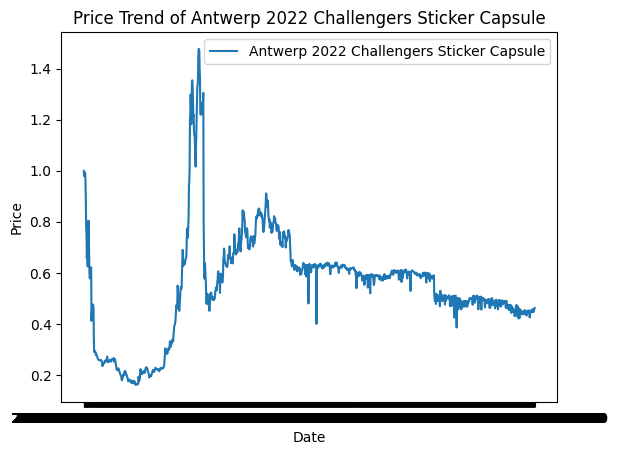

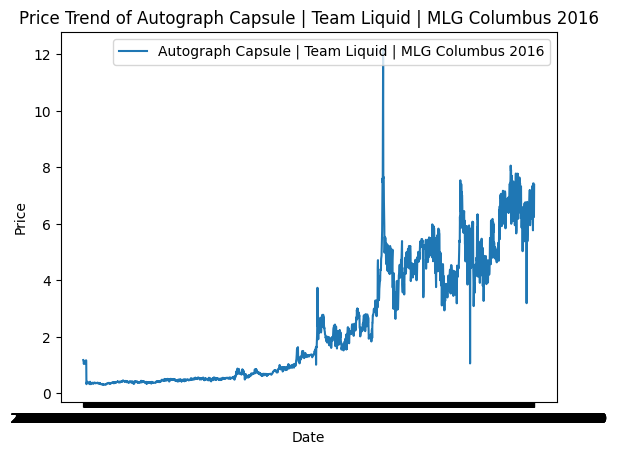

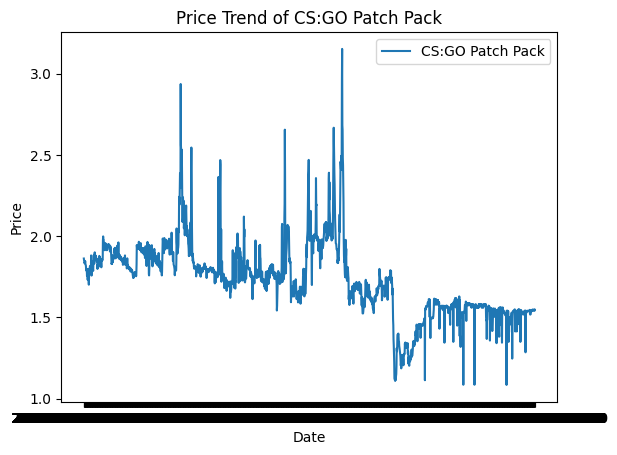

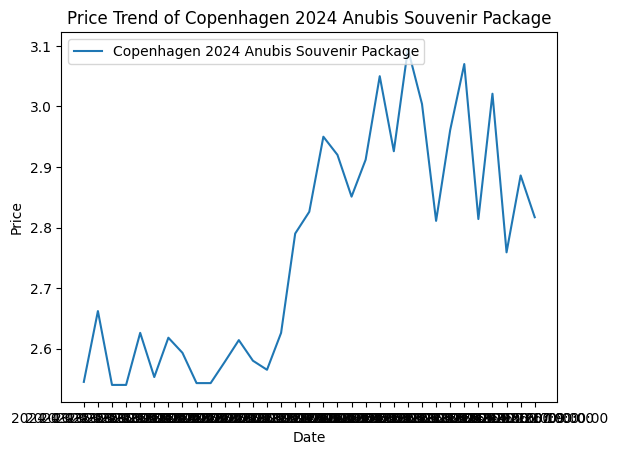

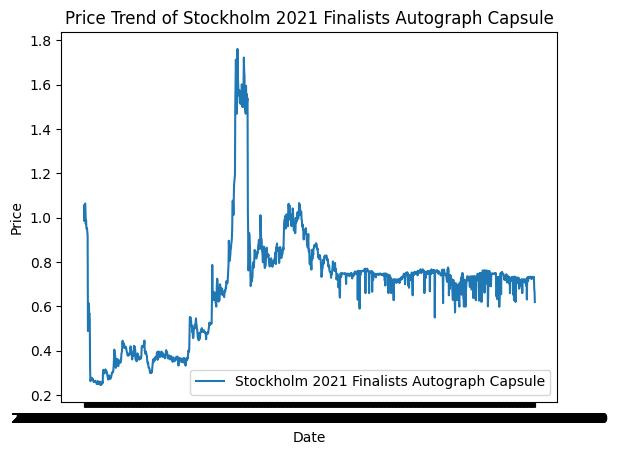

In [15]:
import matplotlib.pyplot as plt

unique_hash_names = all_data['hash_name'].unique()[:5]

# Plot line graphs for each unique hash name
for hash_name in unique_hash_names:
    # Filter the DataFrame for the current hash name
    hash_df = all_data[all_data['hash_name'] == hash_name]
    
    # Plot the line graph
    plt.plot(hash_df['date'], hash_df['price'], label=hash_name)

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Trend of {hash_name}')
    plt.legend()

# Show the plot
    plt.show()

**From all the above steps and out data collection here are some points about data:**

- Data consist of 28374312 rows and 4 columns and is using 865.9+MB of memory.
- There are no missing values in our dataset.
- We have 4 columns of data which are date, price, quantity and hash_name.
- Date starts from 2013-08-13 and is upto 2024-03-26 (which is the day we completed collecting all data).
- Date unique value count is 4764 which higher than 10.5 years*365 because the Steam end point returns 24 data each for last 30 days.
- price ranges from 0.03 to 2526.03
- Quantity ranges from 1 to 964250
- Prices are in $ format.
- Quantity signifies the amount of item sold in 24 hours.

In [16]:
all_data['date'] = pd.to_datetime(all_data['date']).dt.date

# Group by 'hash_name' and date, aggregate price by mean and quantity by sum
result = all_data.groupby(['hash_name', 'date']).agg({'price': 'mean', 'quantity': 'sum'}).reset_index()

In [17]:
result

,hash_name,date,price,quantity
0,'Blueberries' Buckshot | NSWC SEAL,2020-12-03,2.501,50
1,'Blueberries' Buckshot | NSWC SEAL,2020-12-04,1.207,1038
2,'Blueberries' Buckshot | NSWC SEAL,2020-12-05,1.185,803
3,'Blueberries' Buckshot | NSWC SEAL,2020-12-06,1.258,541
4,'Blueberries' Buckshot | NSWC SEAL,2020-12-07,1.334,430
...,...,...,...,...
25257188,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-11,125.990,1
25257189,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-14,118.950,1
25257190,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-15,136.634,2
25257191,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-16,118.137,1


In [18]:
result.to_csv('Datasets/all_data_clean.csv', index = False)